In [19]:
import matplotlib.pyplot as plt 
import numpy as np
import random 
from mpl_toolkits import mplot3d
import pandas as pd
import pathlib

# Updated Code

In [3]:
def decreasingSeqGen(p,k):
    """
    Input: Lower limit and higher limit (int)
    Output: List of length K with random values between low and high
    """
    decreasingSeq = []
    for i in range(k):
        # mean = a, var = b^2
        decreasingSeq.append(np.random.normal(0, 1/(np.power(i+1, p))))
    return decreasingSeq

def genTrigFun(a_k, b_k):
    """
    Input: Two sequences of length K
    Output: Trig function f(t) with coefficients corresponding to sequences a_k, b_k
    """
    def fun_t (t):
        sum = 0
        for i in range(K):
            sum += a_k[i]*np.sin(i*t) + b_k[i]*np.cos(i*t)
        return sum
    return (fun_t)

def speed(x_t, y_t):
    """
    Input: 2 arrays of length of TIME_T
    Output: 1 array of length of TIME_T representing the speed 
    """
    return np.sqrt(np.gradient(x_t)**2 + np.gradient(y_t)**2)
    
def curvature(x_t, y_t):
    """
    Input: 2 arrays of length of TIME_T
    Output: 1 array of length of TIME_T representing the curvature
    """
    # TODO: USE DETERMINANT TO SCALE UP EASIER
    
    num = abs(np.gradient(x_t)*np.gradient(np.gradient(y_t))
             - np.gradient(y_t)*np.gradient(np.gradient(x_t)))
    denom = speed(x_t, y_t) ** 3
    return (num/denom)

def genericPlotAgainstTime(f_t, x_t, y_t):
    plt.plot(TIME_T, f_t(x_t(TIME_T), y_t(TIME_T)))

def plotParametric (x_t, y_t):
    """ 
    Input: 2 functions of t, x(t) and y(t)
    Output: Plots x(t) against y(t). Does not return value.
    """
    plt.plot(x_t(TIME_T), y_t(TIME_T))

In [70]:
def genCurve(k, p, time_start, time_stop, frame_rate, file_name, plot=True):
    if (time_stop - time_start > 6.28 ):
        print("WARNING: Your time range is bigger than 2*pi - this will generate a closed loop!")
    time_t = np.arange(time_start, time_stop, 1/frame_rate)

    # Coefficients - 1 x K
    a_k = decreasingSeqGen(p, k)
    b_k = decreasingSeqGen(p, k)
    c_k = decreasingSeqGen(p, k)
    d_k = decreasingSeqGen(p, k)

    x_fun = genTrigFun(a_k, b_k)
    y_fun = genTrigFun(c_k, d_k)

    # Coordinates - 1 x len(TIME_T)
    x = x_fun(time_t)
    y = y_fun(time_t)

    # Speed and curvature - 1 x len(TIME_T)
    spd = speed(x, y)
    crv = curvature(x, y)
    
    if(plot):
        # Plots
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
        plt.subplot(221)
        plotParametric(genTrigFun(a_k, b_k), genTrigFun(c_k, d_k))
        plt.title("Plane Curve")

        plt.subplot(222)
        kSeq = np.arange(0, k, 1)
        plt.plot(kSeq, a_k)
        plt.plot(kSeq, b_k)
        plt.plot(kSeq, c_k)
        plt.plot(kSeq, d_k)
        plt.title("Coefficients")

        plt.subplot(223)
        plt.plot(time_t, spd)
        plt.title("Speed")


        plt.subplot(224)
        plt.plot(time_t, crv)
        plt.title("Curvature")
        plt.show()

    # Transform data into dataframe
    df_t = pd.DataFrame((x, y, spd, crv))
    df = df_t.transpose()
    df.columns = ['X', 'Y', 'SPEED', 'CURVATURE']
    
    # Export csv
    data_file_csv = 'Curve Data/data_' + file_name + '.csv'
    df.to_csv(data_file_csv)
    
    summaryStats = df.describe()
    summary_file_csv = 'Curve Data/summary_stats_' + file_name + '.csv'
    summaryStats.to_csv(summary_file_csv)
    return[df, summaryStats]


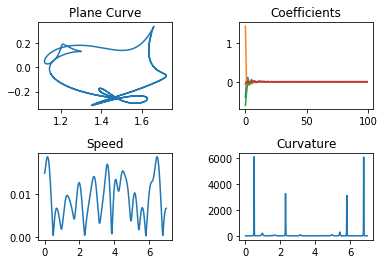

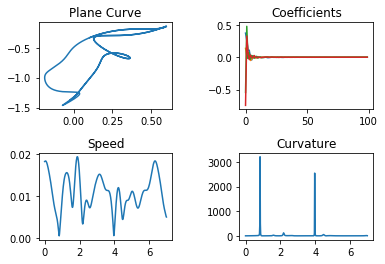

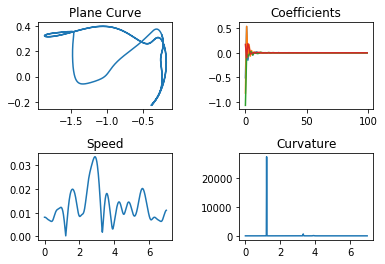

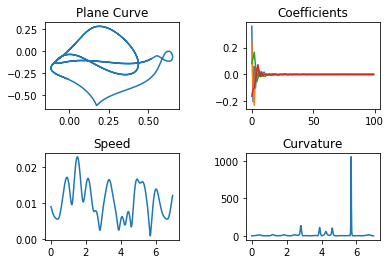

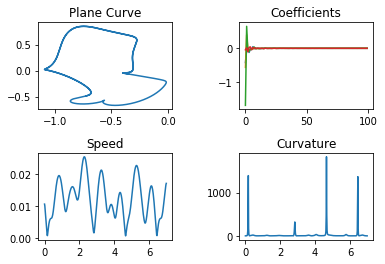

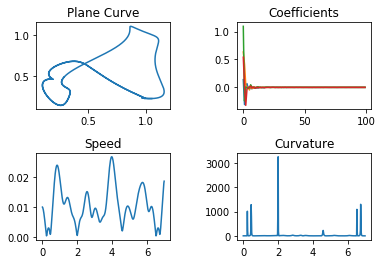

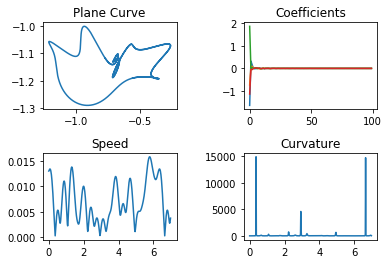

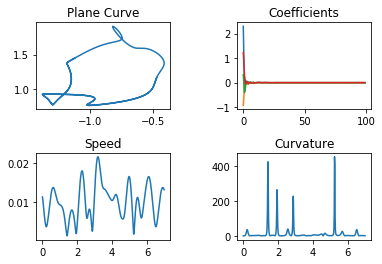

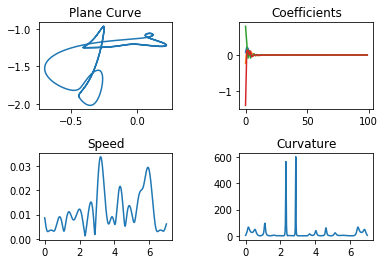

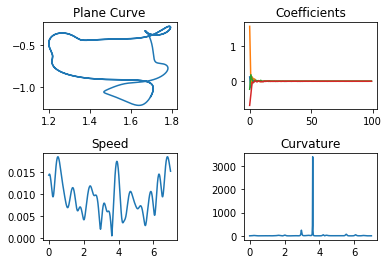

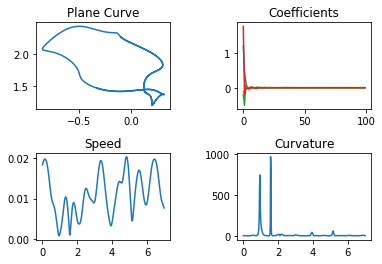

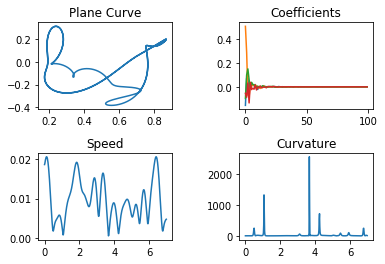

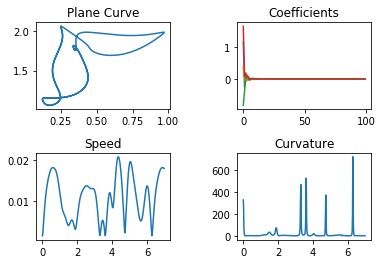

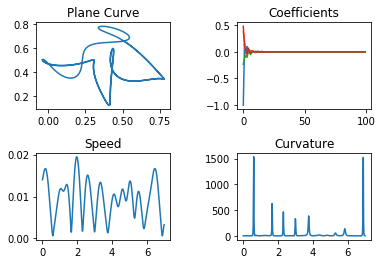

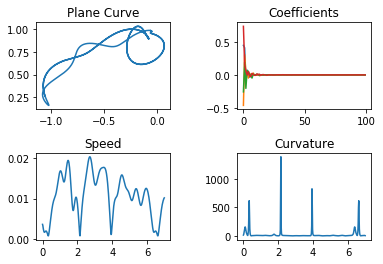

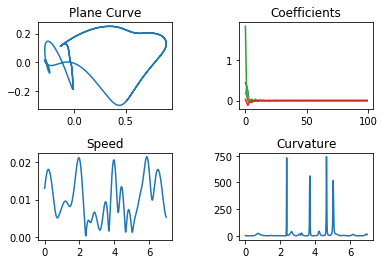

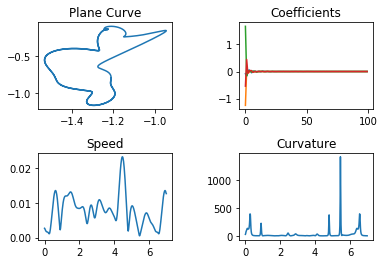

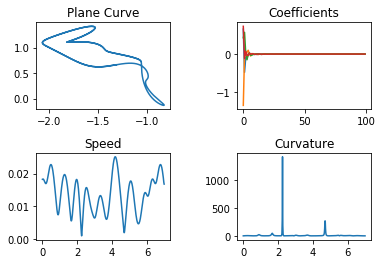

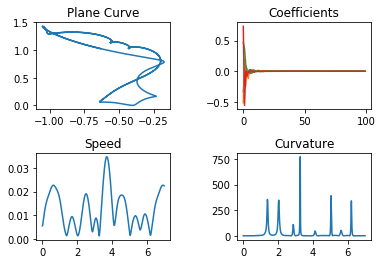

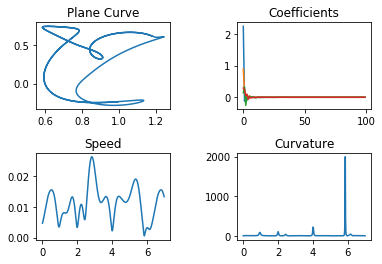

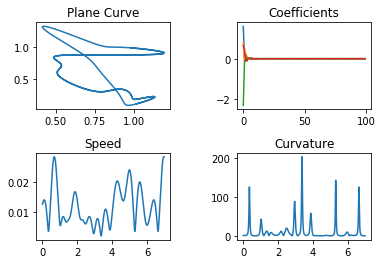

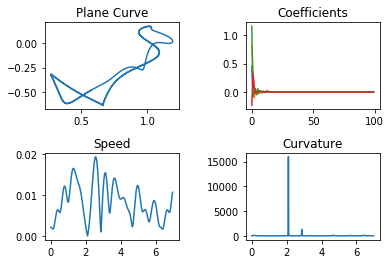

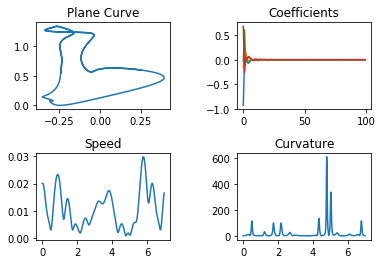

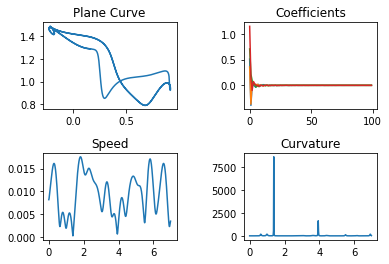

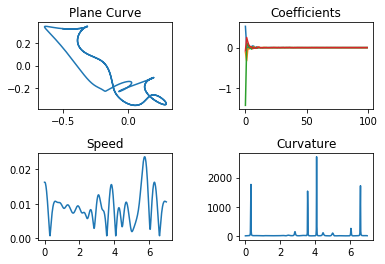

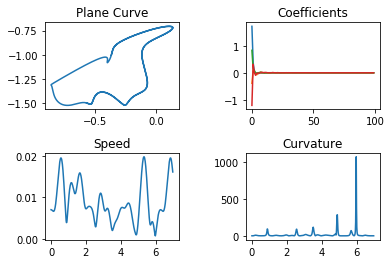

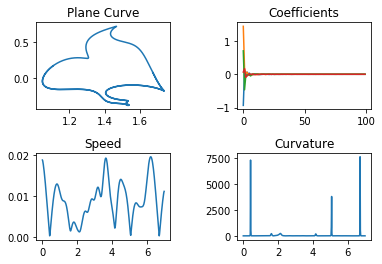

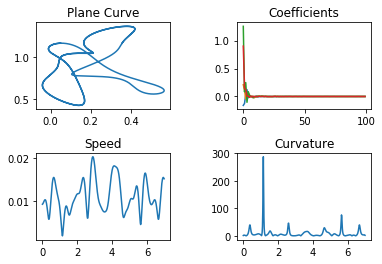

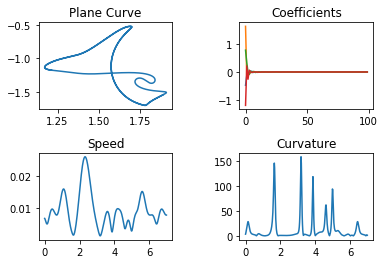

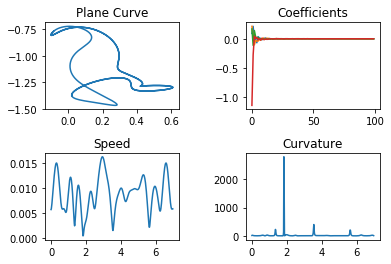

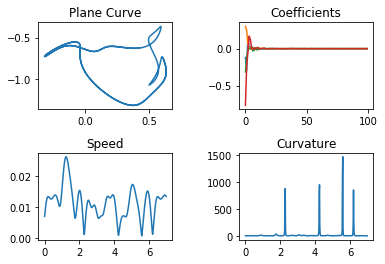

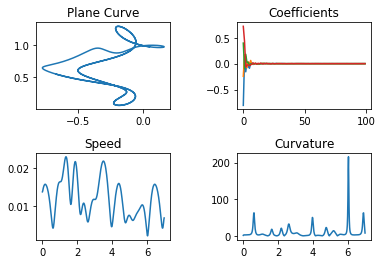

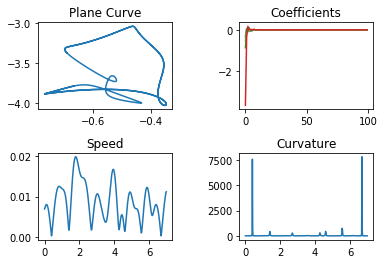

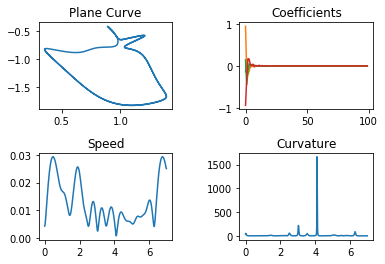

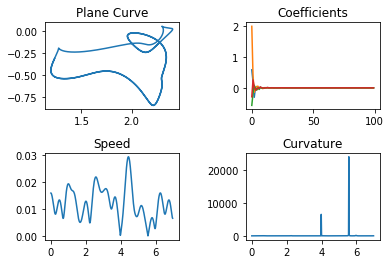

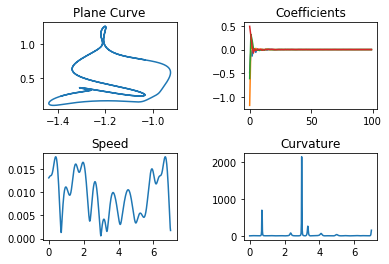

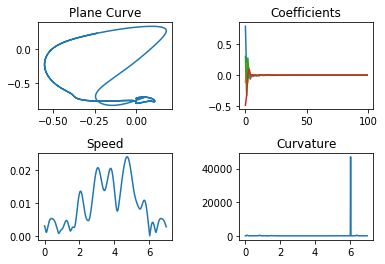

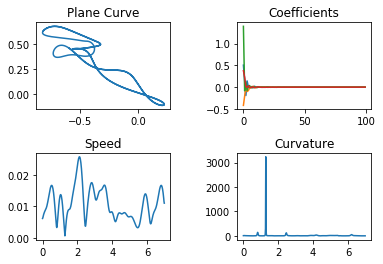

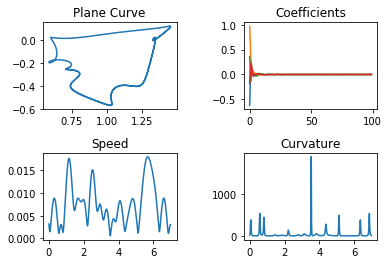

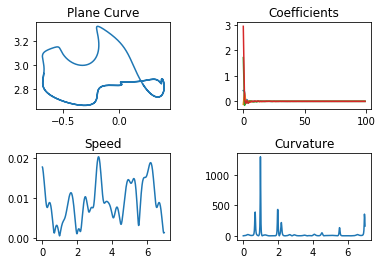

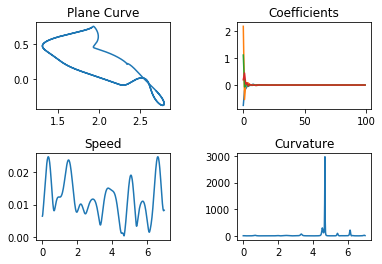

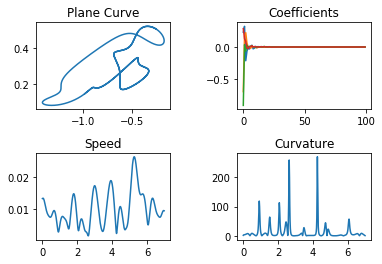

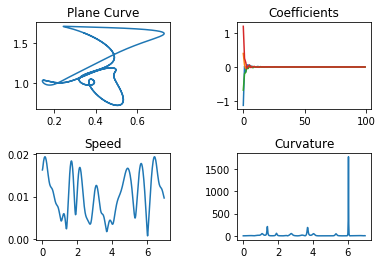

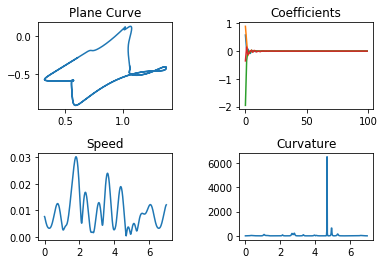

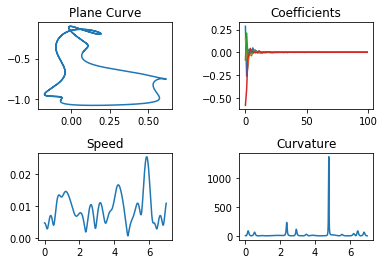

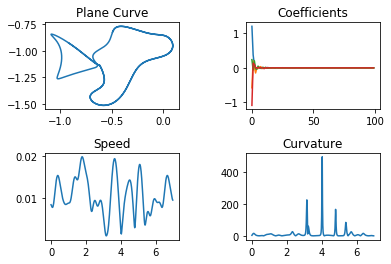

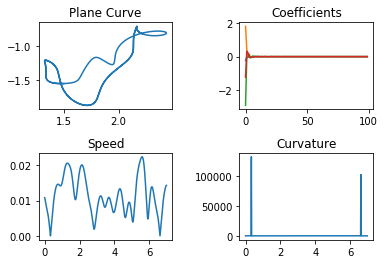

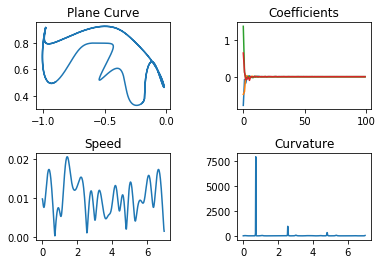

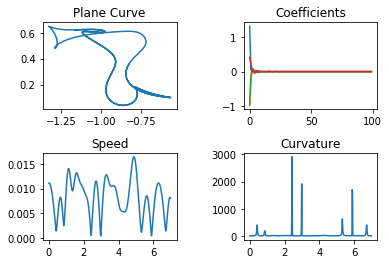

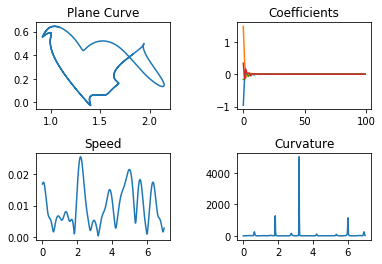

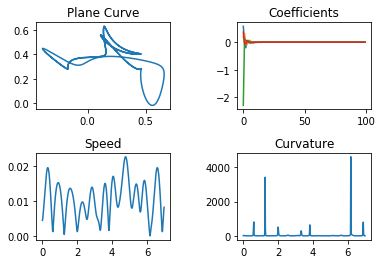

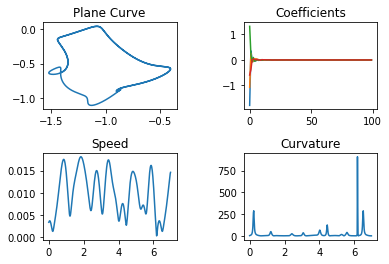

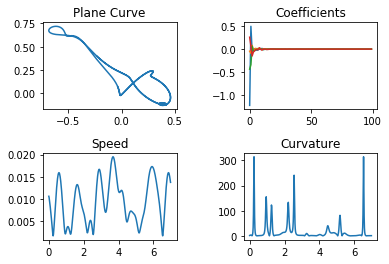

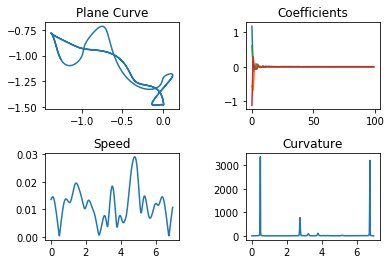

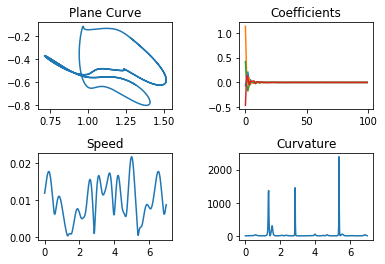

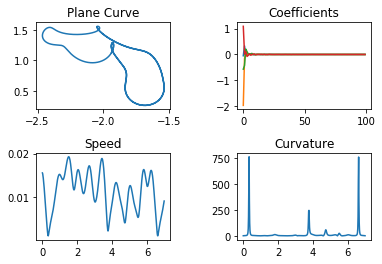

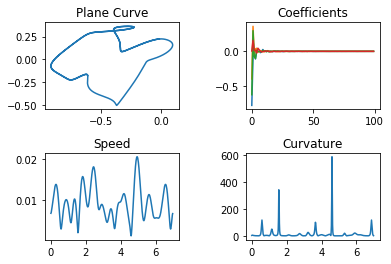

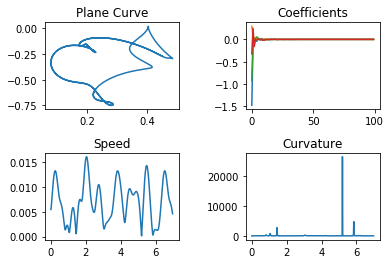

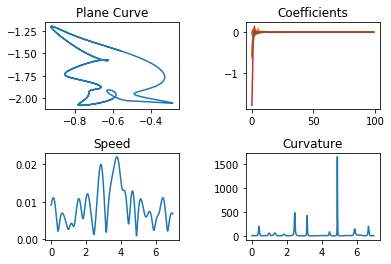

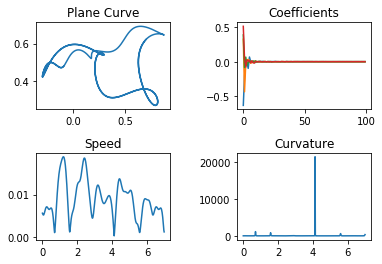

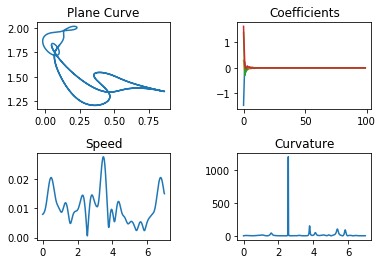

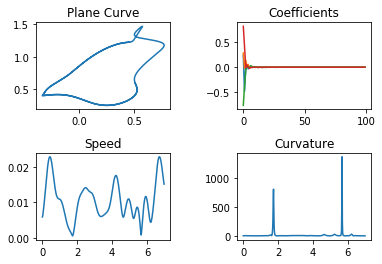

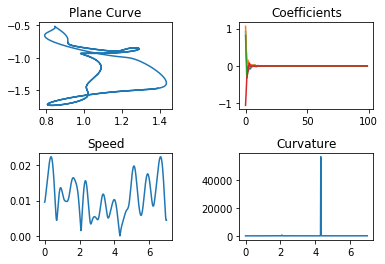

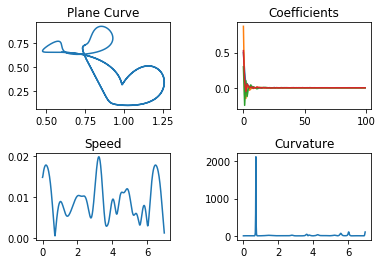

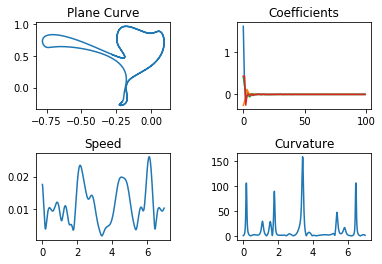

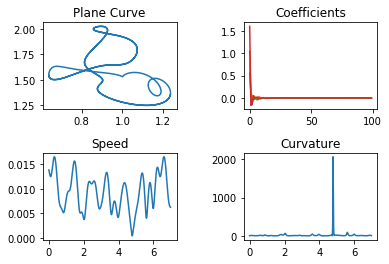

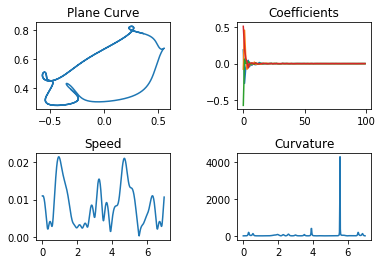

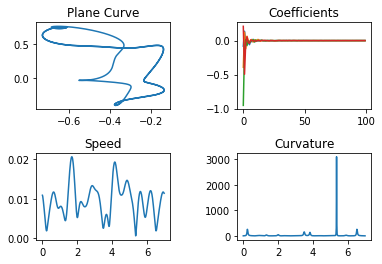

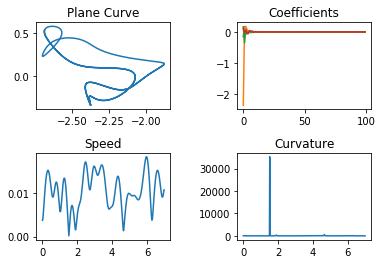

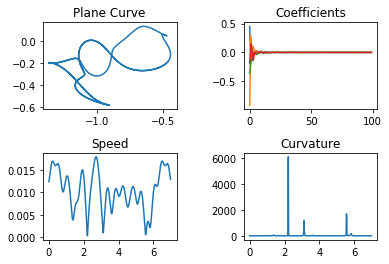

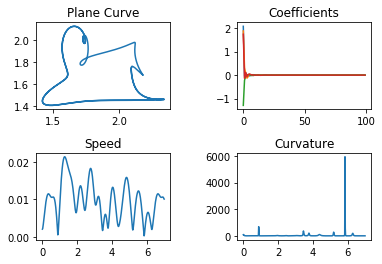

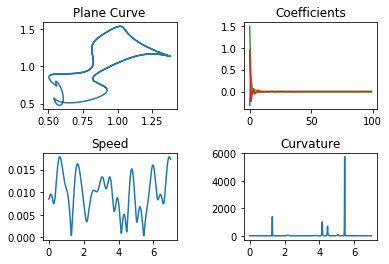

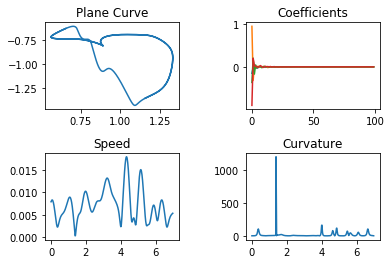

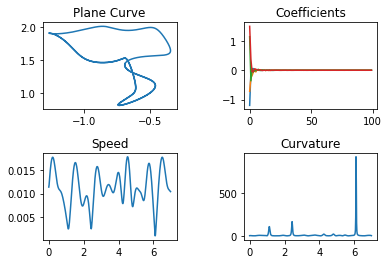

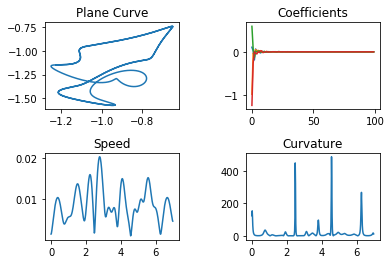

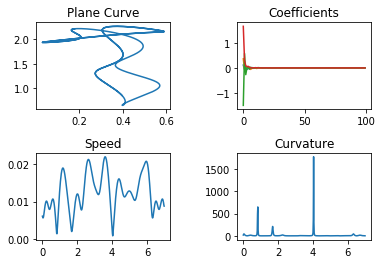

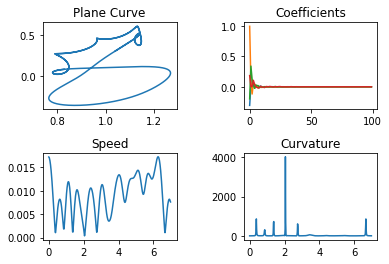

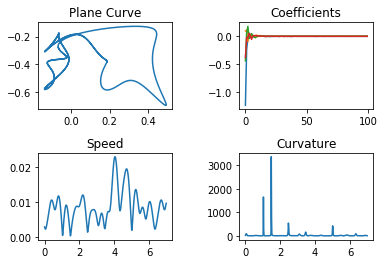

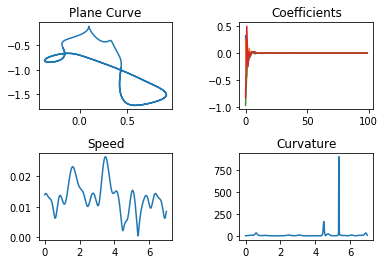

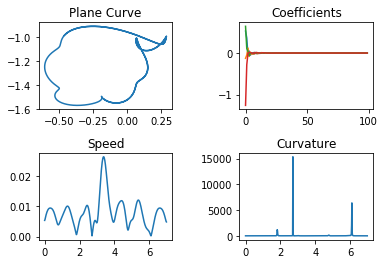

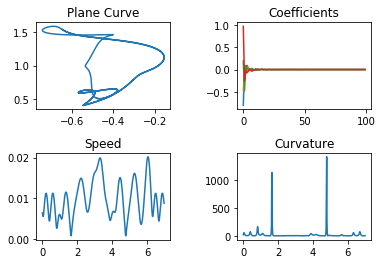

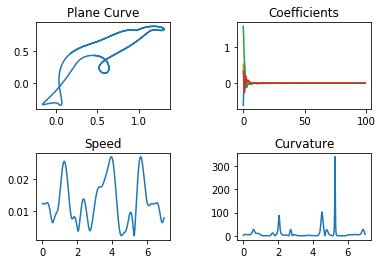

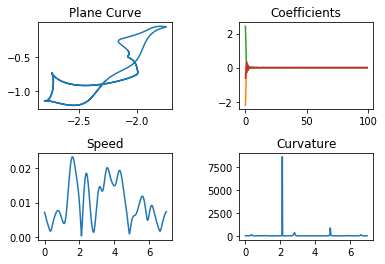

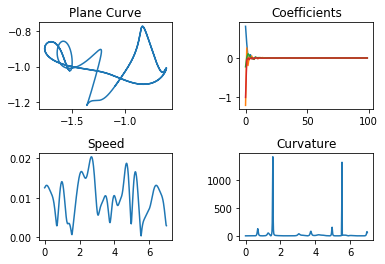

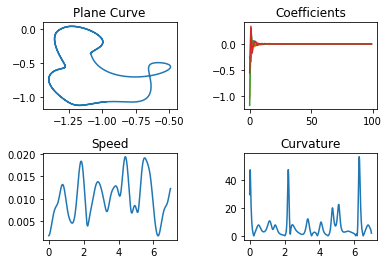

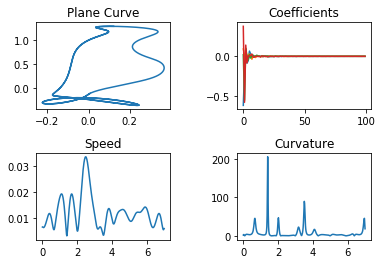

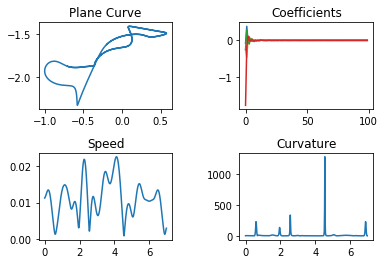

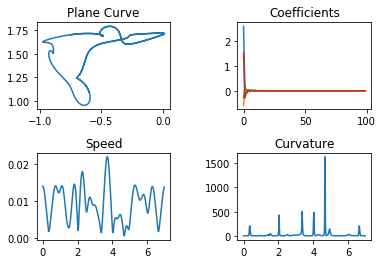

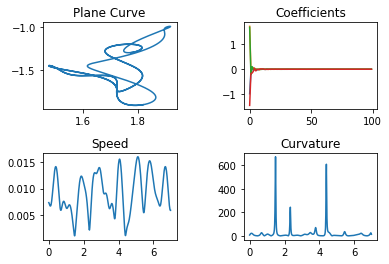

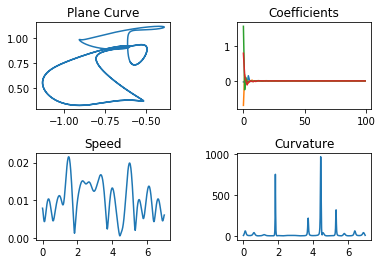

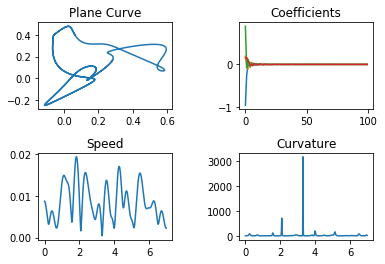

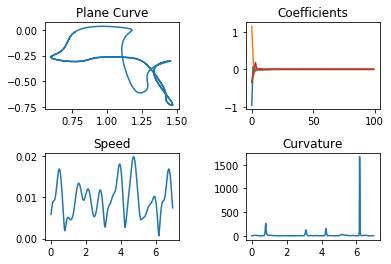

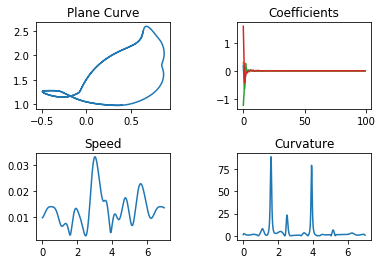

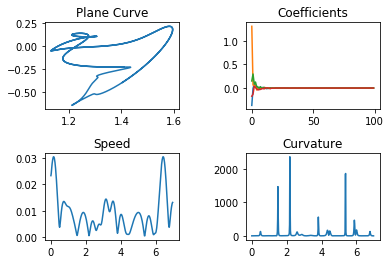

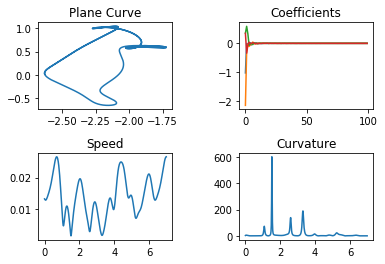

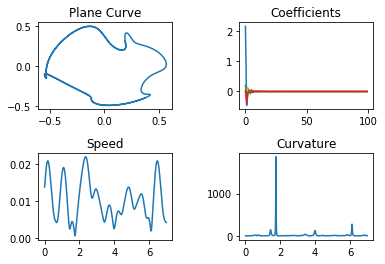

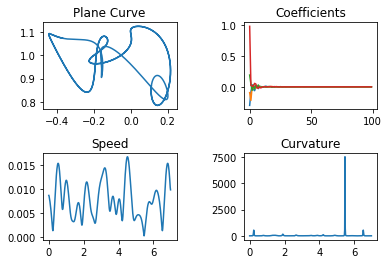

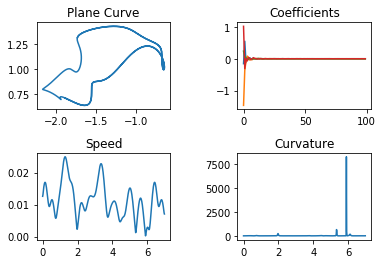

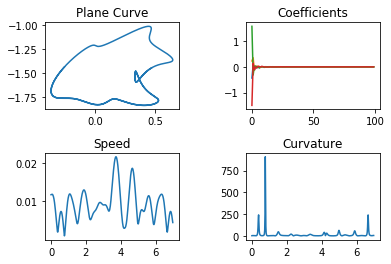

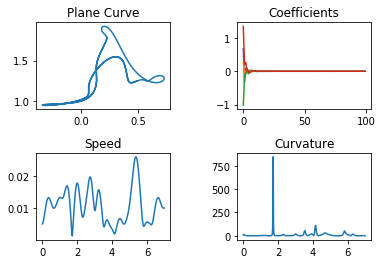

In [71]:
def genNCurves(n):
    for i in range(n):
                 #k   #p    #start  #stop #file_name          #plot
        genCurve(100, 2, 0, 7,      60,   ('curve' + str(i)), plot = True)[0]

In [60]:
genCurve(100, 2, 3, 7, 60, 'curve02', plot = False)[1]

,X,Y,SPEED,CURVATURE
count,240.000000,240.000000,240.000000,240.000000
mean,-0.598216,0.688558,0.009199,32.969084
std,0.152459,0.344058,0.003890,250.346699
min,-0.953884,-0.079714,0.000352,0.012597
25%,-0.642401,0.512093,0.006293,1.386528
50%,-0.533137,0.749752,0.008768,3.560018
75%,-0.492052,0.981777,0.012592,11.489880
max,-0.436451,1.142314,0.017166,3566.600459


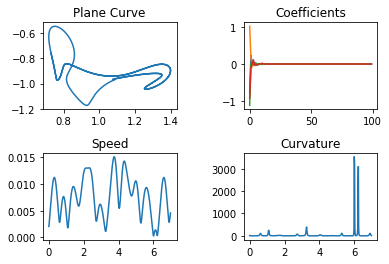

In [91]:
data = genCurve(100, 2, 0, 7,60,('curve' + str(i)), plot = True)[0]

In [98]:
from scipy.signal import argrelextrema

ls = data['CURVATURE']
ls

0      12.193985
1      12.452602
2       8.752474
3       5.347678
4       3.547782
         ...    
415    96.022901
416    67.011000
417    42.686375
418    20.625238
419    11.120479
Name: CURVATURE, Length: 420, dtype: float64

In [152]:
df = pd.DataFrame(data)
n=1 # number of points to be checked before and after 
# Find local peaks
df['min_crv'] = df.iloc[argrelextrema(df.CURVATURE.values, np.less_equal, order=n)[0]]['CURVATURE']
df['max_crv'] = df.iloc[argrelextrema(df.CURVATURE.values, np.greater_equal, order=n)[0]]['CURVATURE']

df['min_spd'] = df.iloc[argrelextrema(df.SPEED.values, np.less_equal, order=n)[0]]['SPEED']
df['max_spd'] = df.iloc[argrelextrema(df.SPEED.values, np.greater_equal, order=n)[0]]['SPEED']



In [153]:
#filter according to mean
for i in range(420):
    if df['min_crv'][i] > np.mean(df['min_crv']):
        df['min_crv'][i] = float("NaN")

        
#filter according to mean
for i in range(420):
    if df['max_crv'][i] < np.mean(df['max_crv']):
        df['max_crv'][i] = float("NaN")

#filter according to mean
for i in range(420):
    if df['min_spd'][i] > np.mean(df['min_spd']):
        df['min_spd'][i] = float("NaN")

        
#filter according to mean
for i in range(420):
    if df['max_spd'][i] < np.mean(df['max_spd']):
        df['max_spd'][i] = float("NaN")

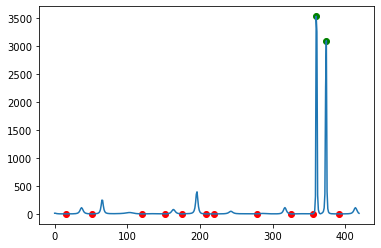

In [155]:
# Plot results
plt.scatter(df.index, df['min_crv'], c='r')
plt.scatter(df.index, df['max_crv'], c='g')
plt.plot(df.index, df['CURVATURE'])
plt.show()

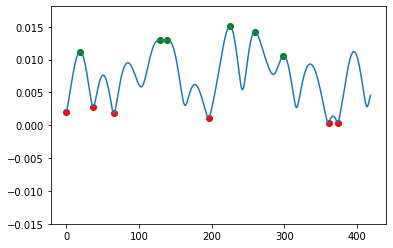

In [156]:
# Plot results
plt.scatter(df.index, df['min_spd'], c='r')
plt.scatter(df.index, df['max_spd'], c='g')
plt.plot(df.index, df['SPEED'])
plt.show()

In [147]:
np.gradient(data['CURVATURE'].to_numpy())

array([ 2.58616853e-01, -1.72075567e+00, -3.55246183e+00, -2.60234600e+00,
       -1.41850413e+00, -8.37259030e-01, -5.24323078e-01, -3.43096293e-01,
       -2.31616317e-01, -1.59348683e-01, -1.10184237e-01, -7.51117568e-02,
       -4.88141778e-02, -2.79825877e-02, -1.04308625e-02,  5.39779588e-03,
        2.07266297e-02,  3.66423183e-02,  5.42487753e-02,  7.48147683e-02,
        9.99476796e-02,  1.31831620e-01,  1.73586252e-01,  2.29840065e-01,
        3.07684306e-01,  4.18314267e-01,  5.79941794e-01,  8.23119542e-01,
        1.20074551e+00,  1.80726320e+00,  2.81565579e+00,  4.54572902e+00,
        7.56733258e+00,  1.27245352e+01,  2.03907351e+01,  2.71212049e+01,
        2.20468469e+01, -1.21814217e-01, -2.19557541e+01, -2.66964451e+01,
       -2.01234544e+01, -1.27149287e+01, -7.69780508e+00, -4.72343273e+00,
       -2.99970608e+00, -1.98559981e+00, -1.37366091e+00, -9.95817208e-01,
       -7.59828122e-01, -6.14425779e-01, -5.31160138e-01, -2.99512487e-01,
        2.08428356e-01,  